# Load data and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('../data/varietal_vintage_qualities_USA_1996-2020.csv')
wine.head()

,varietal,state,region,vintage,vintage_rating
0,chardonnay,CA,napa,1996,90
1,chardonnay,CA,napa,1997,94
2,chardonnay,CA,napa,1998,87
3,chardonnay,CA,napa,1999,88
4,chardonnay,CA,napa,2000,88


In [37]:
wine['state_ava'] = wine.state + '_' + wine.region

In [38]:
wine.state_ava.unique()

array(['CA_napa', 'CA_RRV', 'CA_sonoma', 'CA_carneros',
       'CA_anderson valley', 'CA_santa barbara', 'CA_central coast',
       'CA_north coast', 'CA_south coast', 'CA_sierra foothills',
       'OR_willamette valley', 'WA_columbia valley'], dtype=object)

In [21]:
wine.region.value_counts().index.values

array(['sonoma', 'central coast', 'napa', 'RRV', 'carneros',
       'columbia valley', 'santa barbara', 'willamette valley',
       'sierra foothills', 'north coast', 'south coast',
       'anderson valley'], dtype=object)

# Consolidate data

To have more data / class, we have decided to separate the varietals (grape species) into either thick or thin skinned grapes. The intuition behind this is that skin thickness determines the weather conditions that will be favorable for desired growth. That is, thin-skinned grapes, such as pinot noir and chardonnay, are more delicate and thrive in more fair weather / cooler climates. Alternatively, thick-skinned grapes such as cabernet sauvingnon are more hardy and thus can be growth successfully in warmer weather.


If there are multiple varietals of the same class (thick v. thin) for a specific AVA (region) and vintage (year), we will average the response label (vintage quality/rating) within the class.

In [5]:
wine.varietal.unique()

array(['chardonnay', 'cabernet sauvignon', 'zinfadel', 'pinot noir',
       'syrah'], dtype=object)

In [26]:
cls_label = {'chardonnay':'thin',
             'pinot noir': 'thin',
             'cabernet sauvignon': 'thick',
             'zinfadel': 'thick',
             'syrah': 'thick'}

df2 = wine.copy().loc[:, ['varietal', 'region', 'vintage', 'vintage_rating']]
df2.varietal = df2.varietal.apply(cls_label.get)
df2 = df2.rename(columns={'varietal':'skin', 'vintage_rating':'quality'})
df2.head()

,skin,region,vintage,quality
0,thin,napa,1996,90
1,thin,napa,1997,94
2,thin,napa,1998,87
3,thin,napa,1999,88
4,thin,napa,2000,88


In [27]:
df3 = pd.DataFrame(columns = df2.columns)
idx = 0
for i, subdf in df2.groupby(['skin', 'region', 'vintage']):
    row = subdf.iloc[0, :3].to_list()
    row.append(np.mean(subdf.quality))
    df3.loc[idx, :] = row
    idx += 1

In [29]:
print(df3.shape)
df3.head()

(362, 4)


,skin,region,vintage,quality
0,thick,central coast,1998,83.0
1,thick,central coast,1999,86.0
2,thick,central coast,2000,84.0
3,thick,central coast,2001,91.0
4,thick,central coast,2002,88.0


In [33]:
df3.to_csv('../data/wine_processed.csv')

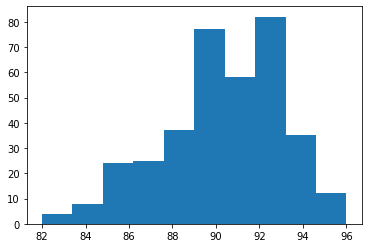

In [32]:
plt.hist(df3.quality)
plt.show()